<a href="https://colab.research.google.com/github/fallahibagaskara/news-dataset-cleanup/blob/main/News_Dataset_Cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import package/libary**

In [93]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

**Import RAW dataset**

In [94]:
TURNBACKHOAX_CSV = './dataset/news/raw/turnbackhoax_10k_raw_data.csv'
KOMPAS_CSV = './dataset/news/raw/kompas_1k_raw_data.csv'

In [95]:
turnbackhoax_df = pd.read_csv(TURNBACKHOAX_CSV)
kompas_df = pd.read_csv(KOMPAS_CSV)

turnbackhoax_df
kompas_df

,Title,Timestamp,FullText,Tags,Author,Url
0,"Disinformasi, Propaganda Sayap Kanan, dan Nara...","7 Agustus 2024, 8:40 WIB",KOMPAS.com - Kerusuhan terjadi di berbagai kot...,"Inggris, sayap kanan, disinformasi, kerusuhan ...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/08/0...
1,Fakta Seputar Pengunduran Diri Joe Biden dari ...,"22 Juli 2024, 18:40 WIB",KOMPAS.com - Presiden Amerika Serikat (AS) Joe...,"Joe Biden, Biden mundur dari pencalonan, Biden...","Jawahir Gustav Rizal, Kristian Erdianto",https://www.kompas.com/cekfakta/read/2024/07/2...
2,Menelusuri Aktivitas Terakhir Penembak Donald ...,"16 Juli 2024, 16:54 WIB",KOMPAS.com - Pihak berwenang Amerika Serikat m...,"Donald Trump, penembak donald trump, penembaka...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/07/1...
3,Rekor dan Pencapaian Timnas Spanyol pada Euro ...,"16 Juli 2024, 10:12 WIB",KOMPAS.com - Tim nasional (timnas) sepak bola ...,"Euro 2024, spanyol juara euro 2024, Rekor timn...","Luqman Sulistiyawan, Kristian Erdianto",https://www.kompas.com/cekfakta/read/2024/07/1...
4,Fakta Seputar Penembakan Donald Trump: Kronolo...,"15 Juli 2024, 15:59 WIB","KOMPAS.com - Presiden ke-45 Amerika Serikat, D...","Donald Trump, trump ditembak, penembakan Donal...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/07/1...
...,...,...,...,...,...,...
1028,[Kabar Data] Kedigdayaan Microsoft di Dunia Ga...,"20 Januari 2022, 14:11 WIB",KOMPAS.com - Microsoft belum lama ini mengakui...,"activision blizzard, xbox, video game, Microsoft","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2022/01/2...
1029,[Kabar Data] Perkembangan Jaringan 5G Indonesia,"19 Januari 2022, 9:21 WIB","KOMPAS.com - Memasuki 2022, Kementerian Komuni...","5G, jaringan 5g, jaringan 5g di indonesia, 5g ...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2022/01/1...
1030,[Kabar Data] Dampak Letusan Gunung Bawah Laut ...,"17 Januari 2022, 17:29 WIB",KOMPAS.com - Letusan gunung berapi Hunga Tonga...,"Tonga, tsunami tonga, tsunami tonga 2022","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2022/01/1...
1031,"Joe Rogan Picu Kontroversi, Spotify Dituntut T...","17 Januari 2022, 12:21 WIB",KOMPAS.com - Platform streaming musik dan podc...,"podcast, Spotify, misinformasi, Joe Rogan","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2022/01/1...


**Cek data null**

In [96]:
turnbackhoax_df.info()
kompas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10000 non-null  object
 1   Timestamp  10000 non-null  object
 2   FullText   10000 non-null  object
 3   Tags       10000 non-null  object
 4   Author     10000 non-null  object
 5   Url        10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      1033 non-null   object
 1   Timestamp  1033 non-null   object
 2   FullText   1033 non-null   object
 3   Tags       1033 non-null   object
 4   Author     1033 non-null   object
 5   Url        1033 non-null   object
dtypes: object(6)
memory usage: 48.6+ KB


**Hapus data jika ada kolom/data = null**

In [97]:
turnbackhoax_df = turnbackhoax_df.dropna()
turnbackhoax_df.info()

kompas_df = kompas_df.dropna()
kompas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10000 non-null  object
 1   Timestamp  10000 non-null  object
 2   FullText   10000 non-null  object
 3   Tags       10000 non-null  object
 4   Author     10000 non-null  object
 5   Url        10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      1033 non-null   object
 1   Timestamp  1033 non-null   object
 2   FullText   1033 non-null   object
 3   Tags       1033 non-null   object
 4   Author     1033 non-null   object
 5   Url        1033 non-null   object
dtypes: object(6)
memory usage: 48.6+ KB


**Fungsi ekstrak narasi**

In [98]:
def retrieve_narasi_turnbackhoax(text):
    narasi = ''
    narasi_start_splitters = ['NARASI:', 'Narasi(Diterjemahkan ke Bahasa Indonesia)', '[NARASI]:', 'Narasi :', '[NARASI]', 'Narasi:', 'NARASI :']
    for s in narasi_start_splitters:
        if s in text:
            narasi = text.split(s)[1]
            break

    narasi_ended = ''
    narasi_end_splitter = ['PENJELASAN:', '[PENJELASAN]:', 'Penjelasan :', '[PENJELASAN]', 'PENJELASAN', 'PENJELASAN :']
    for s in narasi_end_splitter:
        if s in text:
            narasi_ended = narasi.split(s)[0]
            break

    if len(narasi_ended) > 0:
        narasi = narasi_ended

    lanjutan_narasi = ''
    lanjutan_narasi_splitters = ['(Lanjutan Narasi)']
    for s in lanjutan_narasi_splitters:
        if s in text:
            lanjutan_narasi = text.split(s)[1]

    narasi_lengkap = narasi + ' ' + lanjutan_narasi
    return narasi_lengkap

def retrieve_narasi_kompas(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # Hilangkan promosi literasi di akhir
    promo_literasi = "Terangi negeri dengan literasi"
    if promo_literasi in text:
        text = text.split(promo_literasi)[0]

    # Hilangkan prefix KOMPAS.com / JAKARTA, KOMPAS.com -
    text = re.sub(r"^(JAKARTA, )?KOMPAS\.com[\s\-]*", "", text, flags=re.IGNORECASE)

    return text.strip()

In [99]:
turnbackhoax_df['Narasi'] = turnbackhoax_df['FullText'].apply(retrieve_narasi_turnbackhoax)
turnbackhoax_df.head()

kompas_df['Narasi'] = kompas_df['FullText'].apply(retrieve_narasi_kompas)
kompas_df.head()

,Title,Timestamp,FullText,Tags,Author,Url,Narasi
0,"Disinformasi, Propaganda Sayap Kanan, dan Nara...","7 Agustus 2024, 8:40 WIB",KOMPAS.com - Kerusuhan terjadi di berbagai kot...,"Inggris, sayap kanan, disinformasi, kerusuhan ...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/08/0...,Kerusuhan terjadi di berbagai kota di Inggris ...
1,Fakta Seputar Pengunduran Diri Joe Biden dari ...,"22 Juli 2024, 18:40 WIB",KOMPAS.com - Presiden Amerika Serikat (AS) Joe...,"Joe Biden, Biden mundur dari pencalonan, Biden...","Jawahir Gustav Rizal, Kristian Erdianto",https://www.kompas.com/cekfakta/read/2024/07/2...,Presiden Amerika Serikat (AS) Joe Biden menyat...
2,Menelusuri Aktivitas Terakhir Penembak Donald ...,"16 Juli 2024, 16:54 WIB",KOMPAS.com - Pihak berwenang Amerika Serikat m...,"Donald Trump, penembak donald trump, penembaka...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/07/1...,Pihak berwenang Amerika Serikat masih terus me...
3,Rekor dan Pencapaian Timnas Spanyol pada Euro ...,"16 Juli 2024, 10:12 WIB",KOMPAS.com - Tim nasional (timnas) sepak bola ...,"Euro 2024, spanyol juara euro 2024, Rekor timn...","Luqman Sulistiyawan, Kristian Erdianto",https://www.kompas.com/cekfakta/read/2024/07/1...,Tim nasional (timnas) sepak bola Spanyol membu...
4,Fakta Seputar Penembakan Donald Trump: Kronolo...,"15 Juli 2024, 15:59 WIB","KOMPAS.com - Presiden ke-45 Amerika Serikat, D...","Donald Trump, trump ditembak, penembakan Donal...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/07/1...,"Presiden ke-45 Amerika Serikat, Donald Trump, ..."


**Cek narasi**

In [100]:
turnbackhoax_df.info()
kompas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10000 non-null  object
 1   Timestamp  10000 non-null  object
 2   FullText   10000 non-null  object
 3   Tags       10000 non-null  object
 4   Author     10000 non-null  object
 5   Url        10000 non-null  object
 6   Narasi     10000 non-null  object
dtypes: object(7)
memory usage: 547.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      1033 non-null   object
 1   Timestamp  1033 non-null   object
 2   FullText   1033 non-null   object
 3   Tags       1033 non-null   object
 4   Author     1033 non-null   object
 5   Url        1033 non-null   object
 6   Narasi     1033 non-null   object
dtypes: object(7)
memory usage: 56.6+ KB


Text(0.5, 1.0, 'Panjang FullText - Kompas')

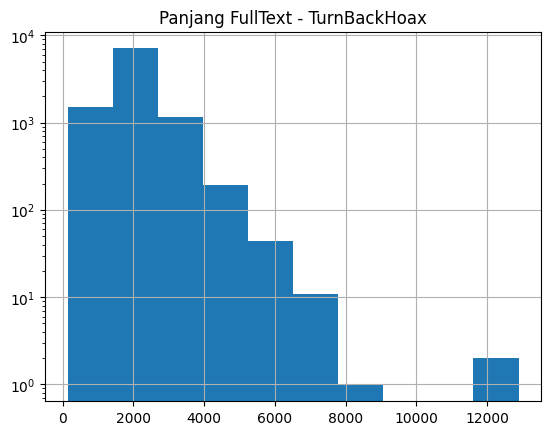

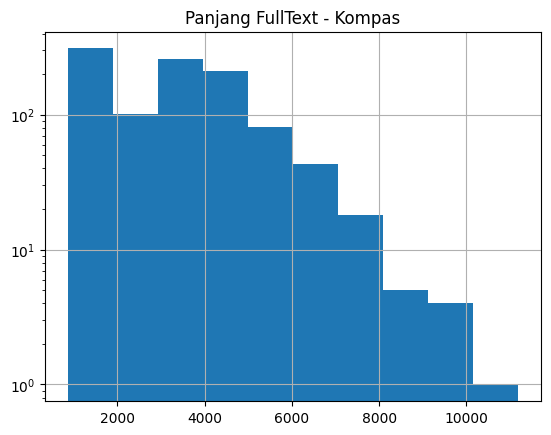

In [101]:
# Histogram panjang FullText - TurnBackHoax
plt.figure()
turnbackhoax_df['FullText'].str.len().hist()
plt.yscale('log')
plt.title('Panjang FullText - TurnBackHoax')

# Histogram panjang FullText - Kompas
plt.figure()
kompas_df['FullText'].str.len().hist()
plt.yscale('log')
plt.title('Panjang FullText - Kompas')

Text(0.5, 1.0, 'Panjang Narasi - Kompas')

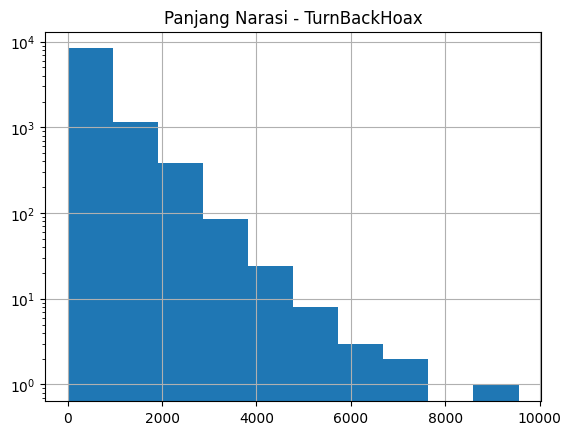

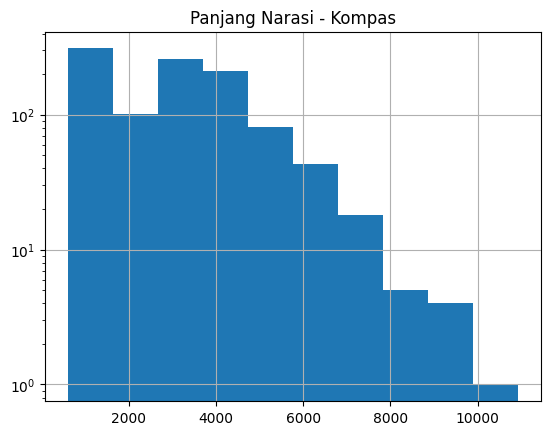

In [102]:
# Histogram panjang Narasi - TurnBackHoax
plt.figure()
turnbackhoax_df['Narasi'].str.len().hist()
plt.yscale('log')
plt.title('Panjang Narasi - TurnBackHoax')

# Histogram panjang Narasi - Kompas
plt.figure()
kompas_df['Narasi'].str.len().hist()
plt.yscale('log')
plt.title('Panjang Narasi - Kompas')

**Fungsi pembersih narasi**

In [103]:
def clean_narasi(text):
    # remove multiple used of '='
    text = text.replace('=', ' ')

    # remove '\n', '\r', and '\t'
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')

    # remove non ascii
    text = ''.join([i if ord(i) < 128 else ' ' for i in text])

    # remove multiple space
    text = re.sub(' +', ' ', text)

    # remove whitespace in start and end
    text = text.strip()
    return text

turnbackhoax_df['Clean Narasi'] = turnbackhoax_df['Narasi'].apply(clean_narasi)
turnbackhoax_df.head(5)

kompas_df['Clean Narasi'] = kompas_df['Narasi'].apply(clean_narasi)
kompas_df.head(5)

,Title,Timestamp,FullText,Tags,Author,Url,Narasi,Clean Narasi
0,"Disinformasi, Propaganda Sayap Kanan, dan Nara...","7 Agustus 2024, 8:40 WIB",KOMPAS.com - Kerusuhan terjadi di berbagai kot...,"Inggris, sayap kanan, disinformasi, kerusuhan ...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/08/0...,Kerusuhan terjadi di berbagai kota di Inggris ...,Kerusuhan terjadi di berbagai kota di Inggris ...
1,Fakta Seputar Pengunduran Diri Joe Biden dari ...,"22 Juli 2024, 18:40 WIB",KOMPAS.com - Presiden Amerika Serikat (AS) Joe...,"Joe Biden, Biden mundur dari pencalonan, Biden...","Jawahir Gustav Rizal, Kristian Erdianto",https://www.kompas.com/cekfakta/read/2024/07/2...,Presiden Amerika Serikat (AS) Joe Biden menyat...,Presiden Amerika Serikat (AS) Joe Biden menyat...
2,Menelusuri Aktivitas Terakhir Penembak Donald ...,"16 Juli 2024, 16:54 WIB",KOMPAS.com - Pihak berwenang Amerika Serikat m...,"Donald Trump, penembak donald trump, penembaka...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/07/1...,Pihak berwenang Amerika Serikat masih terus me...,Pihak berwenang Amerika Serikat masih terus me...
3,Rekor dan Pencapaian Timnas Spanyol pada Euro ...,"16 Juli 2024, 10:12 WIB",KOMPAS.com - Tim nasional (timnas) sepak bola ...,"Euro 2024, spanyol juara euro 2024, Rekor timn...","Luqman Sulistiyawan, Kristian Erdianto",https://www.kompas.com/cekfakta/read/2024/07/1...,Tim nasional (timnas) sepak bola Spanyol membu...,Tim nasional (timnas) sepak bola Spanyol membu...
4,Fakta Seputar Penembakan Donald Trump: Kronolo...,"15 Juli 2024, 15:59 WIB","KOMPAS.com - Presiden ke-45 Amerika Serikat, D...","Donald Trump, trump ditembak, penembakan Donal...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/07/1...,"Presiden ke-45 Amerika Serikat, Donald Trump, ...","Presiden ke-45 Amerika Serikat, Donald Trump, ..."


Text(0.5, 1.0, 'Clean Narasi - Kompas')

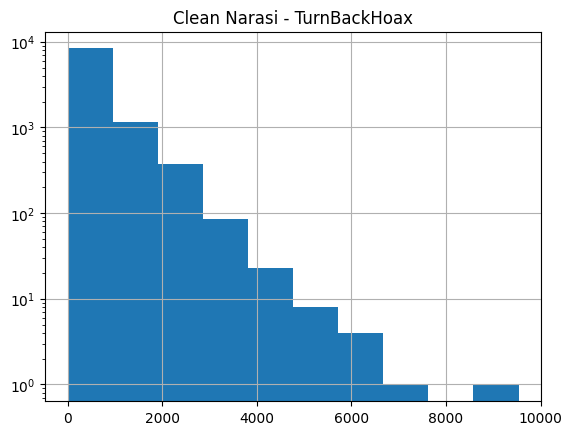

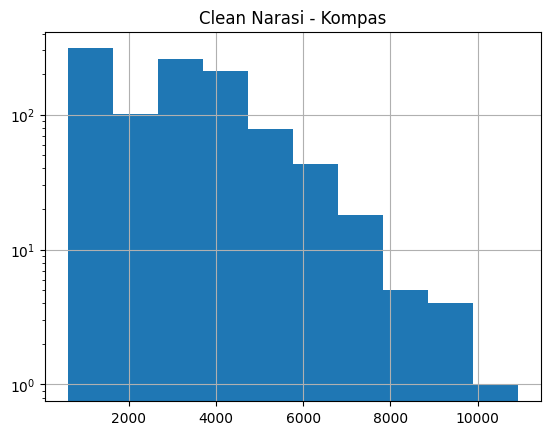

In [104]:
# Histogram clean Narasi - TurnBackHoax
plt.figure()
turnbackhoax_df['Clean Narasi'].str.len().hist()
plt.yscale('log')
plt.title('Clean Narasi - TurnBackHoax')

# Histogram clean Narasi - Kompas
plt.figure()
kompas_df['Clean Narasi'].str.len().hist()
plt.yscale('log')
plt.title('Clean Narasi - Kompas')

**Cek narasi pendek**

In [105]:
turnbackhoax_df_short_narasi = turnbackhoax_df[turnbackhoax_df['Clean Narasi'].str.len() <= 10]
turnbackhoax_df_good_narasi = turnbackhoax_df[turnbackhoax_df['Clean Narasi'].str.len() > 10]
turnbackhoax_df_good_narasi.shape, turnbackhoax_df_short_narasi.shape

kompas_df_short_narasi = kompas_df[kompas_df['Clean Narasi'].str.len() <= 10]
kompas_df_good_narasi = kompas_df[kompas_df['Clean Narasi'].str.len() > 10]
kompas_df_good_narasi.shape, kompas_df_short_narasi.shape

((1033, 8), (0, 8))

In [106]:
print(turnbackhoax_df_good_narasi.sample(1, random_state=1)[['Clean Narasi']].values[0])
print(kompas_df_good_narasi.sample(1, random_state=1)[['Clean Narasi']].values[0])

['"Pintu perbatasan Rafah masih ditutup oleh Mesir hingga bantuan kemanusiaan untuk Palestina akhirnya harus dibuang karena sudah kadaluarsa. Sementara rakyat Palestina kelaparan. Dimana hati nuranimu wahai pemimpin Arab?" Penjelasan: Sebuah video beredar di Facebook diklaim merupakan bantuan kemanusiaan untuk Palestina yang terhalang masuk di Rafah, perbatasan Mesir-Palestina, hingga kedaluwarsa karena Mesir menutup akses masuknya bantuan kemanusiaan tersebut. Setelah ditelusuri klaim tersebut salah. Dilansir dari Kompas.com, video tersebut adalah pembuangan ayam busuk dari 25 truk yang rencananya akan didistribusikan di sekitar distrik Al-Qassin, Saudi Arabia, dan sudah lama beredar di internet sejak 2016. Tidak ada kaitannya dengan bantuan kemanusiaan yang akan dikirimkan ke Palestina. Dengan demikian, video bantuan kemanusiaan untuk Palestina di perbatasan Mesir dibuang karena kedaluwarsa adalah tidak benar dengan kategori Konten yang Menyesatkan. Referensi: https://www.kompas.com/

**Tambah label Hoax/Valid**

In [107]:
turnbackhoax_df = turnbackhoax_df[turnbackhoax_df['Clean Narasi'].str.len() > 10]  # Jaga kualitas data sebelum masuk ML pipeline
turnbackhoax_df['hoax'] = 1 # hoax (TURNBACKHOAX)

kompas_df = kompas_df[kompas_df['Clean Narasi'].str.len() > 10]  # Jaga kualitas data sebelum masuk ML pipeline
kompas_df['hoax'] = 0 # valid (KOMPAS)

In [108]:
turnbackhoax_df.head(3)
kompas_df.head(3)

,Title,Timestamp,FullText,Tags,Author,Url,Narasi,Clean Narasi,hoax
0,"Disinformasi, Propaganda Sayap Kanan, dan Nara...","7 Agustus 2024, 8:40 WIB",KOMPAS.com - Kerusuhan terjadi di berbagai kot...,"Inggris, sayap kanan, disinformasi, kerusuhan ...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/08/0...,Kerusuhan terjadi di berbagai kota di Inggris ...,Kerusuhan terjadi di berbagai kota di Inggris ...,0
1,Fakta Seputar Pengunduran Diri Joe Biden dari ...,"22 Juli 2024, 18:40 WIB",KOMPAS.com - Presiden Amerika Serikat (AS) Joe...,"Joe Biden, Biden mundur dari pencalonan, Biden...","Jawahir Gustav Rizal, Kristian Erdianto",https://www.kompas.com/cekfakta/read/2024/07/2...,Presiden Amerika Serikat (AS) Joe Biden menyat...,Presiden Amerika Serikat (AS) Joe Biden menyat...,0
2,Menelusuri Aktivitas Terakhir Penembak Donald ...,"16 Juli 2024, 16:54 WIB",KOMPAS.com - Pihak berwenang Amerika Serikat m...,"Donald Trump, penembak donald trump, penembaka...","Jawahir Gustav Rizal, Bayu Galih",https://www.kompas.com/cekfakta/read/2024/07/1...,Pihak berwenang Amerika Serikat masih terus me...,Pihak berwenang Amerika Serikat masih terus me...,0


In [109]:
turnbackhoax_df.to_csv("dataset_turnbackhoax_10k_cleaned.csv", index=False, encoding='utf-8-sig')
kompas_df.to_csv("dataset_kompas_1k_cleaned.csv", index=False, encoding='utf-8-sig')